In [1]:
import numpy as np
import scipy
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import time
import multiprocessing
import os
from copy import deepcopy
import random
import numpy.ma as ma

In [2]:
%run ../methodsMemoryDeposition
%run ../main_Zhi

EVERYONE IS DEAD AT: 2.156318712096253 | N_Ptcls: 5| N_snapshots: 1


In [3]:
params = {
    "time_dist_type":"discrete",
    "init_cond":      "single",
    "height":               200,
    "dom":                  400,
    "ndim":                   1,
    "t_max":                100,
    "r_0":                   4,
    "tau":                    1,
    "dt_snapshot":           100,          
    "n_ptcl_snapshot":  np.infty,
    "keep_all":           True, 
    "foldername":   "../SimResults/",
    "filename":     "TestSingle",
    "seed":                None,
    "Whole_Lattice":       True,
    }

space_flat, list_empty_clusters, max_height = main(params)

Stopped at time: 100.0| N_Ptcls: 4003| N_snapshots: 1


UnboundLocalError: local variable 'list_empty_clusters' referenced before assignment

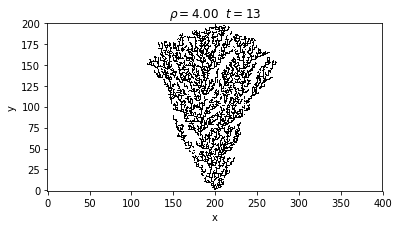

In [10]:
rho = params["r_0"]*params["tau"]

plot_surface(space_flat.transpose(), max_height = None,
            title = r"$\rho = $" + f"{rho:.2f}  " +  r"$t = $" + f"{13:.0f}",
            save = False,
            show = True,)

In [16]:
list_clusters_double_flat = calc_empty_clusters(space_flat, max_height, params, np.inf)


In [17]:
M, V, S = calc_MVS_empty_clusters(list_clusters_double_flat, params)

In [13]:
list_clusters_single_flat = unflat_empty_clusters(list_empty_clusters, params)

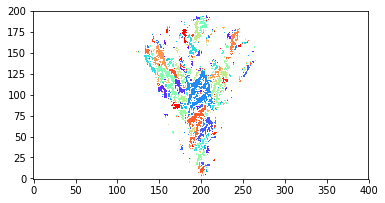

In [14]:
plt.figure()
shape_prev_flat = (np.power(params["dom"], params["ndim"]), params["height"])

colors = plt.cm.rainbow(np.linspace(0, 1, 256))
colors[0, :] = [1, 1, 1, 1]  # Set the first color to white

custom_rainbow_cmap = clrs.ListedColormap(colors)

single_cluster = np.zeros(shape_prev_flat)
for cluster in list_clusters_single_flat:
    random_color = np.random.rand(1)
    for coord in cluster:
        single_cluster[coord[0], coord[1]] = random_color

    img = single_cluster.reshape(shape_prev_flat).transpose()
    plt.imshow(img, cmap=custom_rainbow_cmap, origin= "lower")
plt.colormaps
plt.show()